In [147]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy

In [150]:
npl=spacy.load("en_core_web_sm")

In [214]:
cv=CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=.1)

In [216]:
df= pd.read_csv('./Data/childrens_books.csv')

In [218]:
df.head()

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young..."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,The Very Hungry Caterpillar tells the story of...
2,3,The Giving Tree,Shel Silverstein,1964,4.38,The Giving Tree is a touching and bittersweet ...
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convi..."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime s..."


In [220]:
def lower_sentence(series):
    output=series.str.lower()
    output=output.str.replace(r'\[.*?\]', '', regex=True)
    # remove puntuations
    output=output.str.replace(r'[^\w\s]', '', regex=True)
    return output

In [222]:
def clean_sentence(series):
    doc=npl(series)
    output=[token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(output)

In [224]:
df['Clean_Description']= lower_sentence(df.Description).apply(clean_sentence)

In [225]:
df.head()

,Ranking,Title,Author,Year,Rating,Description,Clean_Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young...",wild thing follow max young boy send room mi...
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,The Very Hungry Caterpillar tells the story of...,hungry caterpillar tell story caterpillar ea...
2,3,The Giving Tree,Shel Silverstein,1964,4.38,The Giving Tree is a touching and bittersweet ...,giving tree touching bittersweet story tree ...
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convi...",green egg ham samiam try convince reluctant ...
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime s...",goodnight moon gentle rhythmic bedtime story...


In [228]:
dtm=cv.fit_transform(df.Clean_Description)

In [230]:
dtm_df=pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

In [242]:
dtm_df.sum().sort_values(ascending=False).head(10)

story           104
book             75
child            66
young            64
reader           54
illustration     54
adventure        39
classic          36
theme            33
explore          30
dtype: int64

In [246]:
dtm_df.sum().sort_values(ascending=False).tail(10)

girl           11
imagination    11
imaginative    11
magical        11
importance     11
early          10
embark         10
perfect        10
favorite       10
joy            10
dtype: int64

<Axes: >

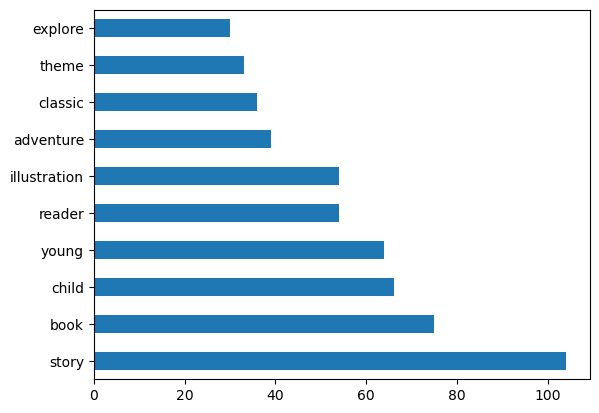

In [258]:
dtm_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')